In [1]:
import numpy as np
from scipy import stats                  # statistical methods
from matplotlib import pyplot as plt     # plotting methods
%matplotlib inline
import scipy.io                          # includes matlab
import warnings                          # to avoid warning - but be aware
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd                      # not yet fixed in 0.20 by anaconda
import statsmodels.api as sm             # also existing in statsmodels
import statsmodels.formula.api as smf
import patsy


# GLM III - Exponentialfamilie, IRLS
- Link-Funktion
- Parametervektor $\boldsymbol\beta$
- Exponentialfamilie
    - Gauß
    - Binomial
    - Poisson
    - ...
- Eigenschaften der Exponentialfamilie
    - Erwartungswert und Varianz
    - Likelihood und deren Ableitungen
    - *Score Statistik* und *Information*
- Max-Likelihood-Schätzer
- Iterative Lösung
    - Newton-Raphson-Methode
    - Scoring Methode
    - IRLS
- `statsmodels.glm`

# Lineare Modelle
#### Zufallsvariable $Y$
$$\begin{align} \mathcal{E}(Y_i) &= \mu_i \\
Y_i\; &\sim \mathcal{N}(\mu_i, \sigma^2)\end{align}$$
mit 
$$ \mu_i = \mathbf{x}_i^T\boldsymbol\beta$$
- *dieselbe* Abhängigkeit je Versuchsbedingung $i,\;i\in[1\dots n]$
- Parametervektor $\boldsymbol\beta \in \mathbb{R}^p$
    - verdichtet Information
    - Prediktor(en) $X \in \mathbb{R}^{n\times p}$ 
    - Vorhersage für abhängige Variable $Y\in \mathbb{R}^n$
- Wahrscheinlicheitsverteilung für realisierten Wert $y_i$ der Zufallsvariable $Y_i$
$$f(y_i;\mathbf{X}_i,\boldsymbol\beta) = \mathcal{N}(\mathbf{X}_i^T \boldsymbol\beta, \sigma^2)$$

# *Generalisierte Lineare Modelle*
$$\begin{align} \mathcal{E}(\mathbf{Y}) &= \boldsymbol\mu \\
                 g(\boldsymbol\mu) = \boldsymbol\eta     &= \mathbf{X}\boldsymbol\beta \end{align}$$
bzw.
$$\mathcal{E}(\mathbf{Y}) = g^{-1}(\mathbf{X}\,\boldsymbol{\beta})$$
- ***unabhängige*** Variablen $X$
    - bilden Spalten der Designmatrix $\mathbf{X} \in \mathbb{R}^{n\times p}$
    - "Kontrollvariable", "Co-Variable", "Vorhersage-Variable", "Indikatorvariable" für Kategorie, ...
    - legen Versuchbedingungen fest
    - wirken linear additiv
- eine ***abhängige*** Variable $Y\in \mathbb{R}^n$
    - wird gemessen in Abhängigkeit von den Versuchbedingungen $i,\;i\in[1\dots n]$
    - Fehler-behaftet $\epsilon$
    - Wahrscheinlichkeitsverteilung $f(y_i;\mathbf{X}_i,\boldsymbol\beta)$ mit Erwartungswert $\mu_i$

$$\begin{align} \mathcal{E}(\mathbf{Y}) &= \boldsymbol\mu \\
                 g(\boldsymbol\mu) = \boldsymbol\eta     &= \mathbf{X}\boldsymbol\beta \end{align}$$
- ***Linearer Term*** $\;\boldsymbol\eta$
- ***Parameter*** $\beta\in\mathbb{R}^p$
    - bestimmen die *lineare* Abhängigkeit $\eta$ von den $X$
    - Informationsverdichtung: i.A. $p\ll n$
- ***Link-Funktion*** $g\;\;(\mathbb{R}\rightarrow\mathbb{R})$
    - transformiert lineare Abhängigkeit
    - umkehrbar $g^{-1}$
    - Einhaltung der Wertebereichs-Grenzen

### Spezialfall Lineare Modelle
$$\begin{align} \mathcal{E}(\mathbf{Y}) &= \boldsymbol\mu \\
     g(\boldsymbol\mu) = \boldsymbol\mu &= \mathbf{X}\boldsymbol\beta \end{align}$$

## Verdichtung der Information
#### Nicht von Interesse: alle einzelnen $\mu_i$

#### Von Interesse: 
- Einfluß der unabhängige Variablen (*erklärende* Variablen, Prediktoren) $X$
    - kategorial
    - kontinuierlich
    - Versuchsbedingungen $i\quad i\in[1\dots n]$ 
- zugehörige Parameter
    - modellieren $X$,  *Gewichtung* der Einflüsse
    - Parameter $\beta_j\quad j\in[1\dots k]\quad k \ll n$

#### Link-Funktion g
- verbindet additiven Einfluß ($\eta_i$) der unabhängigen Variablen $\mathbf{x}_i$ auf die (erwünschte) Verteilung ($\mu_i$) der abhängigen $Y_i$
$$g(\mu_i) = \eta_i = \mathbf{x}_i^T\boldsymbol\beta$$

### Beispiel Bernoulli-Verteilung
Exponentiell abfallende Abhängigkeit
$$\begin{align}
P(Y_i\!=\!1) &= e^{-\lambda t} = \pi \\
P(Y_i\!=\!0) &= 1-e^{-\lambda t} = 1-\pi \\
\end{align}$$
führt unter Verwendung der Link-Funktion
$$g(\pi) = \log(\pi) = -\lambda t$$
auf eine *lineare* Abhängigkeit
$$g(E(Y)) = -\lambda t$$
mit
$$\mathbf{x}_i=[t] \quad \boldsymbol\beta=[-\lambda] $$
zum Generalisierten Linearen Modell
$$E(Y) = g^{-1}(x\beta)$$

#### Anwendung
- Biologie: Genetischer Stammbaum
- Linguistik: Abspaltung von Sprachen zum Zeitpunkt t mit gemeinsamem Wortschatz (=1) in unteschiedliche Entwicklung von Worten (=0)
- Physik: Spannung bei Kondensatorentladung über konstanten Widerstand

## Modell und Fragestellung

**Gesucht** sind die Parameter des Modells $\boldsymbol\beta$

- Signifikanz einer Abhängigkeit, Parameter $\beta_j$
- Unterschiedliche Abhängigkeit bei anderen Daten
- Unterschiedliche Modelle

# Theorie

# Exponentialfamilie für Wahrscheinlichkeitsdichteverteilungen
<br>
$$\begin{align}
f(y; \theta, \phi) &= \exp\bigl(\alpha(\phi)\{y\theta-g(\theta)+h(y)\}+\beta(\phi,y)\bigr)\qquad & \text{Nelder, Wedderburn (1972)} \\
f(y; \theta, \phi) &= \exp\bigl(\frac{(y \theta-B(\theta)}{A(\phi)}+C(y,\phi)\bigr)\qquad & \text{McCullagh, Nelder (1983)} \\
f(y; \theta) &= s(y)t(\theta)\exp\bigl(a(y)b(\theta)\bigr) \\
f(y; \theta) &= \exp\bigl(a(y)b(\theta)+c(\theta)+d(y)\bigr) \qquad & \text{Dobson Barnett (2008)}\quad\;\;
\end{align}$$

- Viele bekannte Verteilungen sind Mitglied der Exponentialfamilie
- Gemeinsame Eigenschaften
- Gemeinsame Methoden

J. Nelder and R. W. M. Wedderburn: "Generalized Linear Models", J. R. Statist. Soc. A, 135 (1972) 370–384.

## 1. Mitglied: Normalverteilung

$$\mathcal{N}(\mu, \sigma^2):\quad f(y | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left({-\frac{(y-\mu)^2}{2\sigma^2}}\right)$$

$$f(y | \theta) = \exp\bigl(a(y)b(\theta)+c(\theta)+d(y)\bigr)$$
- Parameter $\theta$ ist $\mu$
$$\begin{align}
a(y) &= y \\
b(\theta) &= \frac{\mu}{\sigma^2} \\
c(\theta) &= -\frac{\mu^2}{2\sigma^2} - \frac{1}{2}\log(2\pi\sigma^2) \\
d(y) &= -\frac{y^2}{2\sigma^2}
\end{align}$$
- *Störparameter* $\sigma^2$, wird als bekannt vorausgesetzt.

## 2. Mitglied: Binomialverteilung
Der einzige interessierende Parameter bei gegebenem $n$ ist $\pi$. <br> 
$y \in \{0\dots n\}$
$$\mathcal{B}(n, \pi):\quad f(y, \pi) = {n \choose y}\pi^y (1-\pi)^{n-y} $$
$$\begin{align} \mathcal{E}(Y) &= n\pi \\
                \mathrm{Var}(Y) &= n\pi(1-\pi) \end{align}$$

$$\begin{align}
a(y) &= y \\
b(\theta) &= \log\left(\frac{\pi}{1-\pi}\right) \\
c(\theta) &= n\log(1-\pi) \\
d(y) &= \log(\binom{n}{y})
\end{align}$$

## 3. Mitglied: Poissonverteilung
Der einzige interessierende Parameter ist $\lambda$. <br> 
$y \in \mathbb{N}$
$$\mathcal{Po}(\lambda):\quad f_Y(y,\lambda) = \lambda^y\frac{e^{-\lambda}}{y!}$$
$$\begin{align} \mathcal{E}(Y) &= \lambda \\
                \mathrm{Var}(Y) &= \lambda \end{align}$$

$$\begin{align}
a(y) &= y \\
b(\theta) &= \log\lambda \\
c(\theta) &= -\lambda \\
d(y) &= -\log(y!)
\end{align}$$

## Zusammenfassung
Einige wichtige Verteilungen sind Mitglieder der Exponentialfamilie.
- Diese lassen sich mittels *GLM* lösen.

### Implementiert in `statsmodels glm`:
(Derzeit Version 0.8.0)

    Binomial()          Binomial exponential family distribution.
    Gamma()             Gamma exponential family distribution.
    Gaussian()          Gaussian exponential family distribution.
    InverseGaussian()   InverseGaussian exponential family.
    NegativeBinomial()  Negative Binomial exponential family.
    Poisson()           Poisson exponential family.

# Allgemeine Eigenschaften der Exponential-Familie
## Erwartungswert und Varianz

#### Erwartungswert
$$\mathcal{E}\left(a(Y)\right) = -\frac{c'(\theta)}{b'(\theta)}$$

#### Beweis allgemein
Aus der Normierung $$\qquad\int f(y, \theta)\,\mathrm{d}y = 1$$
folgt für deren Ableitung $$\qquad\frac{\text{d}}{\text{d}\theta}\int f(y, \theta)\,\text{d}y = \int f'(y, \theta)\,\text{d}y = 0$$
Für die Exponentialfamilie $$\qquad f(y; \theta) = \exp\bigl({a(y)b(\theta)+c(\theta)+d(y)}\bigr)$$
gilt $$\qquad\qquad f'(y; \theta)= \bigl( a(y)b'(\theta)+c'(\theta)\bigr) f(y, \theta)$$
Integration $$\begin{align}\quad\int f'(y; \theta)\,\mathrm{d}y &= \int\bigl( a(y)b'(\theta)+c'(\theta)\bigr) f(y, \theta)\,\mathrm{d}y \\&= b'(\theta)\int a(y)f(y, \theta) \,\mathrm{d}y+c'(\theta)\int f(y, \theta) \,\mathrm{d}y \\&= b'(\theta)\mathcal{E}\left(a(Y)\right) + c'(\theta) \\&= 0\end{align}$$

#### Beweis speziell
**[ÜA]** Nachzurechnen aus der Verteilung in Exponentialschreibweise

#### Varianz
$$Var\left(a(Y)\right) = \frac{b''(\theta)c'(\theta)-c''(\theta)b'(\theta)}{[b'(\theta)]^3}$$

#### Beweis
Mittels zweiter Ableitung [ÜA]

$$\mathcal{E}\left(a(Y)\right) = -\frac{c'(\theta)}{b'(\theta)}\qquad \text{Var}\left(a(Y)\right) = \frac{b''(\theta)c'(\theta)-c''(\theta)b'(\theta)}{[b'(\theta)]^3}$$

## Kanonische Verteilung
Verteilungen mit 
$$a(Y)=Y$$
nennt man **kanonisch**.

- Normalverteilung, Poissonverteilung, Binomialverteilung sind kanonisch
- Erwartungswert und Varianz für $y$ haben eine einfache Form
- Der Parameter im zugehörigen Term $b(\theta)$ heißt **natürlicher Parameter**


| Verteilung  | natürlicher Param. $b(\theta)$       | Funktion $c(\theta)\qquad\qquad\quad$ | Funktion $d(y) \qquad\quad$ |
| ----------- | ------------------------- | ---------------- | ------------ |
| Normal      | $\frac{\mu}{\sigma^2}$    | $-\frac{\mu^2}{2\sigma^2}-\frac{1}{2}\log(2\pi\sigma^2)$ | $-\frac{y^2}{2\sigma^2}$ |
| Binomial    | $\log(\frac{\pi}{1-\pi})$ | $n \log(1-\pi)$ | $\log \;{n\choose y}$ |
| Poisson     | $\log \lambda$            | $-\lambda$       | $-\log y!$    |


# Log-Likelihood-Funktion
Exponentialfamilie
$$l(\theta;y) = \log(f_Y) = a(y)\cdot b(\theta)+c(\theta)+d(y)$$

## Score Statistik $U$
Ableiten der Log-Likelihood-Funktion nach $\theta$ ergibt die *score statistic* $U$, als Funktion von $Y$ eine Zufallsvariable:
$$U(\theta; y) := \frac{\mathrm{d} l(\theta;y)}{\mathrm{d} \theta} = a(y)\cdot b'(\theta)+c'(\theta)$$

#### mit Erwartungswert 
$$\mathcal{E}(U) = 0$$

**Beweis:**
$\mathcal{E}(U) = \mathcal{E}(a(y))\cdot b'(\theta)+c'(\theta) = -\frac{c'(\theta)}{b'(\theta)}b'(\theta)+c'(\theta) = 0$

## Information $\mathcal{I}$
Varianz von U oder *Information* $\mathcal{I}$
$$\mathcal{I} := \mathrm{Var}(U) = (b'(\theta))^2\cdot \mathrm{Var}\left(a(y)\right) \\
=\frac{b''(\theta)c'(\theta)}{b'(\theta)}-c''(\theta)$$

**Beweis:** aus der Definition $\text{Var}(U)=\mathcal{E}\bigl((U-\mathcal{E}(U))^2\bigr)$ und den Ergebnissen zuvor.

Aus dem **Verschiebungssatz** folgt mit $\mathcal{E}(U) = 0$
$$\mathrm{Var}(U) = \mathcal{E}(U^2)$$

Desweiteren gilt
$$ \mathcal{E}(U') = -\text{Var}(U)$$

**Beweis:** Aus $U' = \frac{\mathrm{d} U}{\mathrm{d} \theta} = a(Y)b''(\theta)+c''(\theta)$
folgt <br>
$\qquad\quad \mathcal{E}(U') = b''(\theta)\mathcal{E}\bigl(a(Y)\bigr)+c''(\theta) = b''(\theta)\left(-\frac{c'(\theta)}{b'(\theta)}\right)+c''(\theta) = -\text{Var}(U)$

### Zusammenfassung
#### Information 
$$\mathcal{I} := \text{Var}(U) = -\mathcal{E}(U')$$

# Zusammengesetzte Wahrscheinlichkeitsverteilung 
# a) ein skalarer Parmater $\theta$

Ein Satz *unabhängiger, identisch verteilter (i.i.d.)* Zufallsvariabler $\quad\mathbf{Y} = [Y_1\dots Y_N]^T\quad $

mit Wahrscheinlichkeitsverteilung $f(y_i, \theta)$ aus der *kanonischen* Exponentialfamilie

hat eine gemeinsame Wahrscheinlichkeitsverteilung
$$\begin{align}
f(\mathbf{Y},\theta) &= \prod_{i=0}^{n} \exp\bigl( y_ib(\theta)+c(\theta)+d(y_i) \bigr) \\
 &= \exp\bigl( \sum_{i=0}^{n} y_ib(\theta) + \sum_{i=0}^{n} c(\theta) + \sum_{i=0}^{n}d(y_i) \bigr)
\end{align}$$
mit
$$\mathcal{E}(Y_i) = (\dots) = \mu$$

# Max-Likelihood-Schätzung
Für kanonische Verteilungen mit $a(y) = y$ gilt
$$\mathcal{E}(Y_i) = \mu_i \qquad g(\mu_i) = \eta_i$$ 

** Gesucht: ** Parameter $\theta$

** Ansatz: Max-Log-Likelihood **
$$l_i(\theta,y_i) =  y_i\cdot b(\theta)+c(\theta)+d(y_i)$$
$$l(\theta,\mathbf{y}) = \sum_{i=0}^{n} l_i = \sum y_ib(\theta) + \sum c(\theta) + \sum d(y_i)$$
$$U=\frac{\mathrm{d}l}{\mathrm{d}\theta}\stackrel{\mathbf{!}}= 0$$

** Ziel **
- Parameter $\widehat{\theta}$
- Maximum der Log-Likelihood $l_{max} = l(\widehat{\theta})$

## Numerische Lösung mittels Iteration nach Newton-Raphson:
Notwendige Bedingung für Maximum: suche Nullstelle $\alpha$
$$U(\widehat\alpha)=0$$
Steigung an einer Stelle $\alpha^{(m-1)}$: $$\frac{\text{d}U}{\text{d}\alpha} = U'(\alpha^{(m-1)}) = \frac{U(\alpha^{(m)}) - U(\alpha^{(m-1)})}{\alpha^{(m)} - \alpha^{(m-1)}} $$
An der Nullstelle gilt $U(\alpha^{(m)}) = 0$ so daß
$$\alpha^{(m)} =  \alpha^{(m-1)} - \frac{U(\alpha^{(m-1)})}{U'(\alpha^{(m-1)})}$$
die iterative Näherung an $\widehat\alpha$ erlaubt.

Für die Mitglieder der Exponentialfamilie wird in guter Näherung $U'$ durch dessen Erwartungswert ersetzt (Fisher Score):
$$U' \leftarrow \mathcal{E}(U') = -\mathcal{I} = -\mathrm{Var}(U)$$
Damit ***iterative Lösung nach Newton-Raphson***
$$\alpha^{(m)} =  \alpha^{(m-1)} + \frac{U(\alpha^{(m-1)})}{\mathcal{I}(\alpha^{(m-1)})}$$


## Beispiel Ausfallwahrscheinlichkeit

Weibull-Verteilung
$$f(y,\lambda,\theta) = \frac{\lambda y^{\lambda-1}}{\theta^\lambda}\exp\Bigl({-\bigl(\frac{y}{\theta}\bigr)^\lambda}\Bigr)$$
mit
- $y>0$ Zeit bis zum Ausfall
- Parameter $\lambda$ Form der Verteilung, hier $\lambda=2$
    - $\lambda=1$ wäre Exponentialverteilung mit konstanter Ausfallrate
    - *Rayleigh*-Verteilung; für gedächtnisbehaftete Lebensdauerverteilung
- Parameter $\theta$ Skalierung. $\Rightarrow$ Diesen gilt es zu schätzen.

#### Darstellung als Exponentialfamilienmitglied:
- $a(y) = y^\lambda\quad$  (nicht kanonisch für $\lambda\neq 1\;$; wir benutzen $\lambda=2$)
- $b(\theta) = -\theta^{-\lambda}$
- $c(\theta) = \log{\lambda}-\lambda\log{\theta}$
- $d(y) = (\lambda-1)\log{y}$

mit einem *Störparameter* $\lambda$.

Daten $Y_i\;$, $\;i=1\dots n=49$ liegen vor:

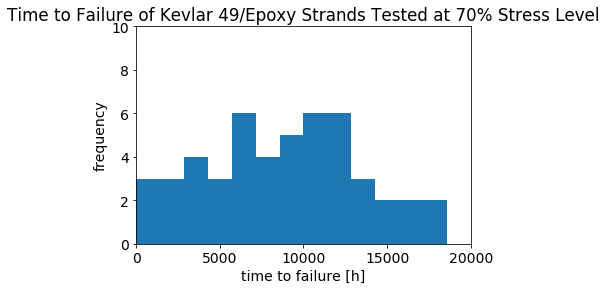

In [4]:
'''data from http://lib.stat.cmu.edu/datasets/Andrews/'''
y = np.asarray([1051, 5817, 9711, 12044, 1337, 5905, 9806,
                13520, 1389, 5956, 10205, 13670, 1921, 6068, 
                10396, 14110, 1942, 6121, 10861, 14496, 2322, 
                6473, 11026, 15395, 3629, 7501, 11214, 16179, 
                4006, 7886, 11362, 17092, 4012, 8108, 11604, 
                17568, 4063, 8546, 11608, 17568, 4921, 8666, 
                11745, 5445, 8831, 11762, 5620, 9106, 11895
])
y.sort()
bins = np.linspace(0, 20000, 15)
plt.hist(y, bins=bins)
plt.xlabel('time to failure [h]')
plt.ylabel('frequency')
plt.axis((0, 20000, 0, 10))
plt.title('Time to Failure of Kevlar 49/Epoxy Strands Tested at 70% Stress Level');


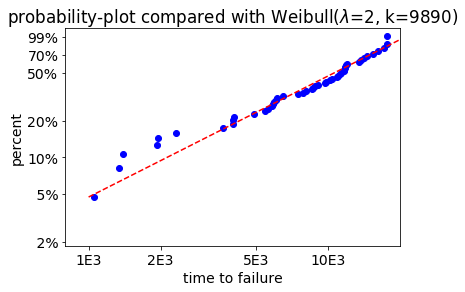

In [5]:
'''compare data to Weibull distribution'''
x = np.linspace(.01, .99, y.size)            # evenly distributed percentiles
z = stats.weibull_min(c=2, scale=1).ppf(x)   # if distribution was exact
plt.loglog(y, z, 'bo')                       # original vs. hypothetical Weibull
plt.xlabel('time to failure')
plt.ylabel('percent')
plt.xticks([1000, 2000, 5000, 10000], ['1E3', '2E3', '5E3', '10E3'] )
percents = np.asarray([.01, .02, .05, .1, .2, .5, .7, .99]) # where in log to set label
yticks = percents*z[-1]                                     # scale by Weibull.ppf(99)
yticklabels = ['{:2.0f}%'.format(100*p) for p in percents]  # percent numbers as strings
plt.yticks(yticks, yticklabels)
plt.minorticks_off()
kfit = 9890
plt.plot([1000, 20000], [1000/kfit, 20000/kfit], 'r--')
plt.title('probability-plot compared with Weibull($\lambda$=2, k={})'.format(kfit))
plt.axis((800, 20000, .04, 2.5));


### Log-Likelihood
$$f=\prod_{i=1}^{n} \frac{2y_i}{\theta^2}\exp\left(-\bigl(\frac{y_i}{\theta}\bigr)^2\right)$$
Daraus
$$l = \sum_{i=1}^{n} \log y_i + \log 2 - 2\log\theta - \bigl(\frac{y_i}{\theta}\bigr)^2$$

damit $U$
$$\frac{\text{d}l}{\text{d}\theta} = U = \sum (\frac{-2}{\theta} + \frac{2y_i^2}{\theta^3})$$

$\mathcal{I}$ als Näherung $U' \leftarrow \mathcal{E}(U')$
$$\mathcal{I} = \mathcal{E}(-U') = \mathcal{E}(\sum -U'_i) = \sum\left[ E(-U'_i)\right]$$

$$\mathcal{I} = \sum_{i=1}^{n} \left[ \frac{b''(\theta)c'(\theta)}{b'(\theta)}-c''(\theta) \right]$$
im Falle der Weibull-Verteilung geschlossen lösbar zu
$$\mathcal{I} = \frac{\lambda^2 n}{\theta^2} = \frac{4 n}{\theta^2}$$

Damit ***Scoring Methode***
$$\theta^{(m)} = \theta^{(m-1)} + \frac{U^{(m-1)}}{\mathcal{I}^{(m-1)}}$$

In [6]:
'''iterative "scoring method" solution for Weibull distribution'''
N = y.size                  # amount of data  
ysquaresum = (y**2).sum()   # const. needed later in calculating U

# U depends on theta; it does not depend on y but on their squared sum
def U(theta):
    return(-2*N/theta + 2*ysquaresum/theta**3)

# since we use only the expectation, information I simplifies to
def I(theta):
    return(4*N/theta**2)

def nexttheta(theta):
    return(theta + U(theta)/I(theta))

ni = 5                       # number of iterations
theta = y.mean()             # starting point

print('#iteration theta      Ux1E6   Ix1E6')
for i in range(ni):          # cycle through iterations
    print('{:2d}       {:9.2f} {:8.2f}  {:6.2f}'
          .format(i, theta, U(theta)*1E6, I(theta)*1E6))
    theta = nexttheta(theta) # theta iteratively 

print('final    {:9.2f} {:8.2f}  {:6.2f}'
      .format(theta, U(theta)*1E6, I(theta)*1E6))


#iteration theta      Ux1E6   Ix1E6
 0         8805.69  2915.75    2.53
 1         9959.20  -132.01    1.98
 2         9892.40    -0.45    2.00
 3         9892.18    -0.00    2.00
 4         9892.18     0.00    2.00
final      9892.18     0.00    2.00


#### [ÜA] exakte Variante mit U und U'; Näherung erlaubt?

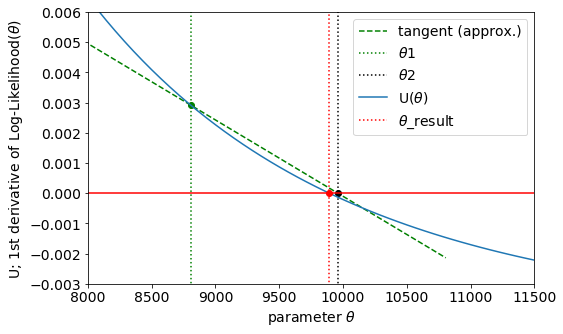

In [7]:
'''
demonstate iteration for U (gain of Likelihood to be maximized)
'''
plt.figure(figsize=(8,5))
theta1, theta2 = [8805.69, 9959.20]  # from iterative approach above
mapprox = I(theta1)                  # approximative tangent gain
trange = np.asarray([theta1-1000, theta1+2000])   # range for plotting
Urange = U(theta1)+mapprox*(theta1-trange) # calculate edges of approx tangent
plt.plot(trange, Urange, 'g--', label='tangent (approx.)') 
plt.plot(theta1, U(theta1), 'go')    # theta-before iteration 
plt.plot(2*[theta1], [-.005, .015], 'g:', label='$\\theta$1')
plt.plot(theta2, 0, 'ko')            # found 2nd theta after 1st iteration
plt.plot(2*[theta2], [-.005, .015], 'k:', label='$\\theta$2')

trange = [8000, 11500]               # total ROI for theta
thetas = np.linspace(trange[0], trange[1])    
plt.plot(thetas, U(thetas), label='U($\\theta$)') # dependency U(theta)
plt.plot(trange, 2*[0], 'r-')        # zero line to approach
plt.plot(2*[theta], [-.004, .010], 'r:', label='$\\theta$_result') 
plt.plot(theta, U(theta), 'ro')      # the correct final result
plt.axis((trange[0], trange[1], -.003, .006))
# plt.axis((9800, 10000, -.001, .001)) # zoom in ... 
plt.xlabel('parameter $\\theta$')
plt.ylabel('U; 1st derivative of Log-Likelihood($\\theta$)')
plt.legend(loc='upper right');


### Ergebnis Anpassung
Der Max-Likelihood-Schätzer der Weibull-Verteilung ist $\theta=9892.18$

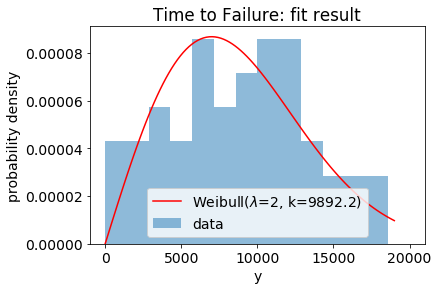

In [8]:
'''resulting fit for Weibull distribution'''
xgrid = np.linspace(0, 19000, 100+1)
plt.hist(y, bins=bins, alpha=.5, normed=True, label='data')
plt.plot(xgrid, stats.weibull_min(c=2, scale=theta).pdf(xgrid), 'r-', 
         label='Weibull($\lambda$=2, k={:.1f})'.format(theta))
plt.xlabel('y')
plt.ylabel('probability density')
plt.title('Time to Failure: fit result')
plt.legend(loc='lower center');


## Ergebnis *Score Methode*
Für Verteilungen aus der Exponentialfamilie
$$f_Y(y|\theta) = \exp{\bigl({a(y)b(\theta)+c(\theta)+d(y)}\bigr)}$$

führt die iterative Anpassung des Verteilungsparameters $\theta$ durch die ***scoring Methode***
$$\theta^{(m)} = \theta^{(m-1)} + \frac{U^{(m-1)}}{\mathcal{I}^{(m-1)}}$$
mit der *Score-Statistik* $U$ (erste Ableitung des Log-Likelihood)
$$U(\theta, y) := \frac{\mathrm{d} l}{\mathrm{d} \theta} = a(y)\cdot b'(\theta)+c'(\theta)$$
und der *Information* $\mathcal{I}$ (genäherte zweite Ableitung)
$$\mathcal{I} := \mathrm{Var}(U) = \mathcal{E}(U') = \frac{b''(\theta)c'(\theta)}{b'(\theta)}-c''(\theta)$$
in wenigen Schritten zum Ergebnis.

Die Methode läßt sich auf mehrdimensionale Parametervektoren $\boldsymbol\theta$ erweitern.


# Zusammengesetzte Wahrscheinlichkeitsverteilungen 
# b) Parametervektor $\boldsymbol\beta$

Ein Satz *unabhängiger, gleich verteilter* Zufallsvariabler $\quad\mathbf{Y} = [Y_1\dots Y_N]^T\quad $

mit Wahrscheinlichkeitsverteilungen $f(y_i, \theta_j),\; i\in[1\dots n]$ aus der selben, *kanonischen* Exponentialfamilie

hat eine gemeinsame Wahrscheinlichkeitsverteilung
$$\begin{align}
f(\mathbf{Y},\boldsymbol\theta) &= \prod_{i=0}^{n} \exp\bigl( y_ib(\theta_i)+c(\theta_i)+d(y_i) \bigr) \\
 &= \exp\bigl( \sum_{i=0}^{n} y_ib(\theta_i) + \sum_{i=0}^{n} c(\theta_i) + \sum_{i=0}^{n}d(y_i) \bigr)
\end{align}$$
mit
$$\mathcal{E}(Y_i) = \mu_i$$
wobei
$$g(\mu_i) = \mathbf{x}_i^T\boldsymbol\beta$$
also auch
$$\theta_i = fkt(\mathbf{x}_i^T\boldsymbol\beta)$$
mit unabhängigen $\beta_j;\; j\in[1\dots k];\; k\ll n$ 

## Mehrdimensional
***Scoring Methode: iterative Lösung***
$$\boldsymbol\beta^{(m)} = \boldsymbol\beta^{(m-1)} + \bigl(\mathcal{I}(\boldsymbol\beta^{(m-1)})\bigr)^{-1} \mathbf{U}(\boldsymbol\beta^{(m-1)})$$

- Parameter $\alpha\;\Rightarrow\;$ Parametervektor $\;\boldsymbol\beta$
- Score-Funktion $U\;\Rightarrow\;$ Score-Vektor $\mathbf{U}$
    - Gradientenvektor der Log-Likelihood $\mathbf{U} := \nabla l $ 
    - mit $U_j = \frac{\partial l}{\partial \beta_j}  $
- Information $\mathcal{I}\;\Rightarrow\;$ Informations-Matrix $\mathcal{I}$

### Wiederholung
$$\mathcal{E}\left(a(Y_i)\right) \stackrel{\text{(kanonisch)}}{=} \mathcal{E}(Y_i) = \mu_i = -\frac{c'(\theta_i)}{b'(\theta_i)}$$

$$\text{Var}\left(a(Y_i)\right) = \frac{b''(\theta_i)c'(\theta_i)-c''(\theta_i)b'(\theta_i)}{[b'(\theta_i)]^3}$$
<br>
$$g(\mu_i) = \eta_i = \mathbf{x}_i^T\boldsymbol\beta$$

#### Modell-Parameter
- Datentupel $y_i, X_{ij}$, Erwartungswerte $\mu_i$ und Verteilungs-Parameter $\theta_i$ mit $i\in[1\dots n]$
- Verdichtete Information in Parametervektor $\boldsymbol\beta$
- Komponenten $\beta_j$ mit $j\in[1\dots p]$ mit i.A. $p\ll n$

### Ableitung für Max-Log-Likelihood-Schätzer
$$\frac{\partial l}{\partial \beta_j} = U_j = \sum_{i=1}^n \bigl( \frac{\partial l_i}{\partial \beta_j} \bigr) = \sum  \bigl( \frac{\partial l_i}{\partial \theta_i}\;\frac{\partial \theta_i}{\partial \mu_i}\;\frac{\partial \mu_i}{\partial \beta_j} \bigr)  $$

1. berechnen unter Verwendung des Erwartungswerts
$$\frac{\partial l_i}{\partial \theta_i} = y_i b'(\theta_i) + c'(\theta_i) = b'(\theta_i)(y_i-\mu_i) $$

2. Umkehrfunktion
$$\frac{\partial \theta_i}{\partial \mu_i} = \frac{1}{\frac{\partial \mu_i}{\partial \theta_i}}$$
durch Ableitung des Erwartungswerts und Verwendung der Varianz
$$\begin{align}
\frac{\partial \mu_i}{\partial \theta_i} &=\frac{c''}{b'}+\frac{c'b''}{(b')^2} \\
  &= b'(\theta_i)\text{Var}(Y_i)
\end{align}$$

3. Kettenregel 
$$\frac{\partial \mu_i}{\partial \beta_j} = \frac{\partial \mu_i}{\partial \eta_i}\;\frac{\partial \eta_i}{\partial \beta_j} = \frac{\partial \mu_i}{\partial \eta_j}\;x_{ij}$$

#### 1. Teilergebnis
Damit ergibt sich die vektorielle ***score***-Funktion
$$U_j = \sum_{i=1}^{n} \bigl( \frac{y_i-\mu_i}{\text{Var}(Y_i)}\;x_{ij}\;\frac{\partial \mu_i}{\partial \eta_i} \bigr)$$
ausgedrückt durch zugängliche Größen

####  Information
$$\mathcal{I} := \text{Var}(U) = -\mathcal{E}(U')$$

Im mehrdimensionalen Fall ist die die Information $\mathcal{I}$ die Varianz-Kovarianz-Matrix der Score-Funktion U 
$$\mathcal{I}_{jk} = \mathcal{E}(U_j\;U_k)$$


mit
$$\begin{align}
\mathcal{I}_{jk} &= \mathcal{E}\biggl( \sum_{i=1}^{n} \bigl( \frac{y_i-\mu_i}{\text{Var}(Y_i)}\;x_{ij}\;\frac{\partial \mu_i}{\partial \eta_i} \bigr)\sum_{i=1}^{n} \bigl( \frac{y_i-\mu_i}{\text{Var}(Y_i)}\;x_{ik}\;\frac{\partial \mu_i}{\partial \eta_i} \bigr)\biggr) \\
 &= \sum_{i=1}^{n}\frac{\mathcal{E}\bigl((Y_i-\mu_i)^2\bigr)x_{ij}x_{ik}}{\bigl(\text{Var}(Y_i)\bigr)^2}\bigl(\frac{\partial\mu_i}{\partial \eta_i}\bigr)^2
\end{align}$$
unter Ausnutzung der Unabhängigkeit $\mathcal{E}\bigl((Y_i-\mu_i)(Y_l-\mu_l)\bigr)=0$ für $i \neq l$. Mit $\mathcal{E}\bigl((Y_i-\mu_i)^2\bigr)=\text{Var}(Y_i)$

#### 2. Teilergebnis
Damit ergibt sich die ***Informationsmatrix***
$$\mathcal{I}_{jk} = \sum_{i=1}^{n}\frac{x_{ij}x_{ik}}{\text{Var}(Y_i)}\bigl(\frac{\partial\mu_i}{\partial \eta_i}\bigr)^2$$

#### Zwischenergebnis
Für die ***Scoring Methode*** ergibt sich
$$\mathbf{b}^{(m)} = \mathbf{b}^{(m-1)} + \bigl(\mathcal{I}^{(m-1)}\bigr)^{-1} \mathbf{U}^{(m-1)}$$

mit dem Schätzer für den Parametervektor $$\mathbf{b} = [\beta_1,\dots,\beta_k]^T$$
der Inversen Informationsmatrix $$\mathcal{I}^{-1}$$
und dem *score*-Vektor $$\mathbf{U}$$

#### Erweiterung
$$\mathcal{I}^{(m-1)}\mathbf{b}^{(m)} = \mathcal{I}^{(m-1)}\mathbf{b}^{(m-1)} + \mathbf{U}^{(m-1)}$$

#### Darstellung linke Seite
$$\mathcal{I}_{jk} = \sum_{i=1}^{n}\frac{x_{ij}x_{ik}}{\text{Var}(Y_i)}\bigl(\frac{\partial\mu_i}{\partial \eta_i}\bigr)^2$$

kann dargestellt werden durch
$$\mathcal{I} = \mathbf{X}^T\mathbf{WX}$$
mit Diagonalmatrix
$$w_{ii}=\frac{1}{\mathrm{Var}(Y_i)}\left( \frac{\partial \mu_i}{\partial \eta_i} \right)^2$$

#### Einsetzen und Zusammenfassen rechte Seite
$$\mathcal{I}^{(m-1)}\mathbf{b}^{(m-1)} + \mathbf{U}^{(m-1)}$$

kann dargestellt werden als
$$\mathbf{X}^T\mathbf{Wz}$$

mit
$$z_i = \sum_{k=1}^p x_{ik} b_{k}^{(m-1)} + (y_i-\mu_i)\frac{\partial \eta_i}{\partial \mu_i}$$

# Ergebnis *IRLS*
$$\mathbf{X}^T\mathbf{W}\mathbf{X}\mathbf{b}^{(m)} = \mathbf{X}^T\mathbf{W}\mathbf{z}$$
- Die selbe Form, wie die Normalengleichungen für ein lineares Modell
    - Kleinste Quadrate Methode
$$\mathbf{X}^T\mathbf{V}^{-1}\mathbf{X}\boldsymbol\beta = \mathbf{X}^T\mathbf{V}^{-1}\mathbf{y} $$
- Designmatrix $\mathbf{X}$
- Gewichtungsmatrix $\mathbf{W}^{(m-1)}$ 
- Zielvektor $\mathbf{z}^{(m-1)}$
- Lösung muß iterativ gewonnen werden
    - Sowohl $\mathbf{z}$
    - als auch $\mathbf{W}$ 
    - hängen über $\boldsymbol\mu$ und $Var(Y_i)$ von $\mathbf{b}^{(m-1)}$ ab
- ***iterative reweighted least squares*** *IRLS*
    - wird in `GLM` der *Python* `statsmodels` verwendet

### Algorythmus
1. Finde einen Startwert $\quad\mathbf{b}^{(0)}$
2. Berechne damit $\qquad\quad\mathbf{z}$ und $\mathbf{W}$
3. Löse $\qquad\qquad\qquad\quad\mathbf{X}^T\mathbf{W}\mathbf{X}\mathbf{b}^{(m)} = \mathbf{X}^T\mathbf{W}\mathbf{z}$ 
$$\mathbf{b}^{(m)} = \Bigl(\mathbf{X}^T\mathbf{W}\mathbf{X}\Bigr)^{-1}\mathbf{X}^T\mathbf{W}\mathbf{z} $$
    - und wiederhole 2. und 3. bis
4. Abbruch bei Konvergenz

## Beispiel: Poisson-Verteilung

$$\mathcal{E}(Y) = \text{Var}(Y)$$
Lineare Abhängigkeit von $x$ mit Link-Funktion $g$ der Identität:
$$\mathcal{E}(Y_i) = \mu_i = \eta_i = \beta_0 + \beta_1 x_i = \mathbf{x}_i^T\boldsymbol\beta$$
mit $\boldsymbol\beta = [\beta_0, \beta_1]^T$ und $\mathbf{x}_i^T = [1, x_i]$


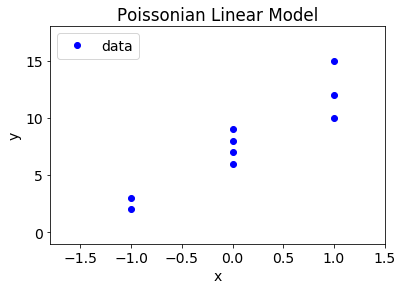

In [9]:
'''Linear Poissonian example'''
y = np.asarray([ 2,  3, 6, 7, 8, 9, 10, 12, 15])  # responses
x = np.asarray([-1, -1, 0, 0, 0, 0,  1,  1,  1])  # covariates
plt.plot(x, y, 'bo', label='data')
plt.axis((-1.8, 1.5, -1, 18))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Poissonian Linear Model')
plt.legend(loc='upper left');


Mit $\frac{\partial\mu}{\partial\eta}=1$ (Link: Identität) ergibt sich
$$w_{ii} = \frac{1}{\text{Var}(Y_i)} = \frac{1}{\beta_0+\beta_1 x_i}$$
Daraus
$$\mathcal{I} = \mathbf{X}^T\mathbf{W}\mathbf{X} = \begin{pmatrix} 
\sum\frac{1}{b_o+b_1 x_i} & \sum\frac{x_i}{b_o+b_1 x_i} \\
\sum\frac{x_i}{b_o+b_1 x_i} & \sum\frac{x_i^2}{b_o+b_1 x_i}
\end{pmatrix}$$
und mit $z$
$$z_i = b_0 + b_1 x_i + (y_i - b_0 - b_1 x_i) = y_i$$
dann
$$\mathbf{X}^T\mathbf{W}\mathbf{z} = \begin{pmatrix} 
\sum\frac{y_i}{b_o+b_1 x_i} \\
\sum\frac{x_i y_i}{b_o+b_1 x_i}
\end{pmatrix}$$

Löse damit
$$\qquad\qquad\qquad\mathbf{X}^T\mathbf{W}^{(m-1)}\mathbf{X}\mathbf{b}^{(m)} = \mathbf{X}^T\mathbf{W}^{(m-1)}\mathbf{z}\qquad$$

In [10]:
'''(fix) design matrix and response variables'''
X = np.vstack((np.ones_like(x), x)).T
z = y
print(X, '...................... design matrix X')
print(z, '... response y')


[[ 1 -1]
 [ 1 -1]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  1]
 [ 1  1]
 [ 1  1]] ...................... design matrix X
[ 2  3  6  7  8  9 10 12 15] ... response y


In [11]:
'''variating vector b'''
b = np.asarray([7, 5])                # as a starter, guessed from graph
N = x.size
W = np.zeros((N, N))                  # provide variance-covariance matrix, yet empty
for i in range(N):                    # but fill diagonal
    W[i, i] = 1/(b[0] + b[1]*x[i])    # with first, yet guessed, values
print(np.round(X.T, decimals=3), '... the (transposed) Design matrix X^T\n')
print(np.round(W, decimals=3), '... the weight matrix W\n')
XtW = X.T.dot(W)
print(np.round(XtW, decimals=3), '... X^T*W\n')
XtWX = X.T.dot(W).dot(X)
print(np.round(XtWX, decimals=3), '... X^T*W*X\n')
print(np.round(np.linalg.inv(XtWX), decimals=3), '... and inverted')


[[ 1  1  1  1  1  1  1  1  1]
 [-1 -1  0  0  0  0  1  1  1]] ... the (transposed) Design matrix X^T

[[ 0.5    0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.5    0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.143  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.143  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.143  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.143  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.083  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.083  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.083]] ... the weight matrix W

[[ 0.5    0.5    0.143  0.143  0.143  0.143  0.083  0.083  0.083]
 [-0.5   -0.5    0.     0.     0.     0.     0.083  0.083  0.083]] ... X^T*W

[[ 1.821 -0.75 ]
 [-0.75   1.25 ]] ... X^T*W*X

[[ 0.729  0.438]
 [ 0.438  1.062]] ... and inverted


In [12]:
'''1st iteration of IRLS for vector b'''
b = np.asarray([7, 5])                # as a starter, guessed from graph
W = np.zeros((N, N))                  # provide variance-covariance matrix, yet empty
for i in range(N):                    # but fill diagonal
    W[i, i] = 1/(b[0] + b[1]*x[i])    # with first, yet guessed, values
XtW = X.T.dot(W)
XtWX = X.T.dot(W).dot(X)
print(np.round(np.linalg.inv(XtWX), decimals=3), '... and inverted')


[[ 0.729  0.438]
 [ 0.438  1.062]] ... and inverted


In [13]:
'''calculates next iterations b^(m+1) from b^(m) given
   using matrices I and U from X and W, inverting X^T.W.X'''

'''solve LGS immediately'''
def iterate(b):
    W = np.zeros((N, N))       # yet empty weights matrix
    for i in range(N):
        # fill diagonals according to b and x
        W[i, i] = 1/(b[0] + b[1]*x[i])
    XtWX = X.T.dot(W).dot(X)   # left hand side, without b
    XtWz = X.T.dot(W).dot(z)   # right hand side
    # solve mathematically (as long as independent)
    return np.linalg.inv(XtWX).dot(XtWz)

'''IRLS by hand'''
b = np.asarray([7., 5.])   # starting value: gain=5 intercept@zero=7
niter=4                    # we know number of steps beforehand
for i in range(niter):     # cycle through iteration steps
    print('itaration {:1d} leads to beta=[{:8.6f}, {:8.6f}]'
          .format(i, b[0], b[1])) 
    b = iterate(b)         # calculate next value

print('final result     beta_hat=[{:8.6f}, {:8.6f}]'
      .format(b[0], b[1]))     


itaration 0 leads to beta=[7.000000, 5.000000]
itaration 1 leads to beta=[7.451389, 4.937500]
itaration 2 leads to beta=[7.451632, 4.935314]
itaration 3 leads to beta=[7.451633, 4.935300]
final result     beta_hat=[7.451633, 4.935300]


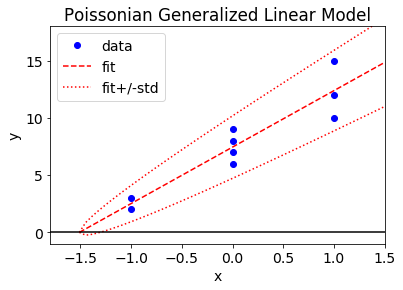

In [14]:
'''Linear (Poissonian) Model - by hand'''
def g(eta):
    return eta               # the boring identity

def predict(x, beta, link):
    X = np.vstack((np.ones_like(x), x)).T
    return link(X.dot(beta))

plt.plot(x, y, 'bo', label='data') # pure data 
xnull = -b[0]/b[1]                 # smallest value with mu>=0
xgrid = np.linspace(xnull, 1.5)
# predict with b-hat from iterative result above
yhat = predict(xgrid, b, g)
plt.plot(xgrid, yhat, 'r--', label='fit')
plt.plot(xgrid, yhat+np.sqrt(yhat), 'r:', label='fit+/-std')
plt.plot(xgrid, yhat-np.sqrt(yhat), 'r:')
plt.plot([-2, 2], 2*[0], 'k-')
plt.axis((-1.8, 1.5, -1, 18))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Poissonian Generalized Linear Model')
plt.legend(loc='upper left');


### Ergebnis IRLS
$$\mathbf{X}^T\mathbf{W}^{(m-1)}\mathbf{X}\mathbf{b}^{(m)} = \mathbf{X}^T\mathbf{W}^{(m-1)}\mathbf{z}^{(m-1)}$$
mit mehrdimensionaler *Iterative Reweighted Least Squares*-Methode lösbar

$$\mathbf{b}^{(m)} = \bigl(\mathbf{X}^T\mathbf{W}^{(m-1)}\mathbf{X}\bigr)^{-1}\mathbf{X}^T\mathbf{W}^{(m-1)}\mathbf{z}^{(m-1)}$$

konvergiert in wenigen Schritten zum Schätzer $\mathbf{b}=\widehat{\boldsymbol\beta}$

In [15]:
import statsmodels.api as sm
# help(sm.GLM)


In [16]:
'''
Linear (Poissonian) Model - glm - but?
'''
# supplies the 1's to the design matrix
X = sm.add_constant(x)
# call fit: start-values, iterate ...
pfit = sm.GLM(endog=y, exog=X).fit()
# print result: parameter vector beta, statistics, etc
print(pfit.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    9
Model:                            GLM   Df Residuals:                        7
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                    2.5974025974
Method:                          IRLS   Log-Likelihood:                -15.935
Date:                Mon, 12 Feb 2018   Deviance:                       18.182
Time:                        13:22:02   Pearson chi2:                     18.2
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4545      0.543     13.721      0.000       6.390       8.519
x1             4.9091      0.729      6.735      0.0

In [17]:
'''
Linear (Poissonian) Model - glm: Poissonian with identity link function
'''
pfit = sm.GLM(endog=y, exog=X, 
              family=sm.families.Poisson(
                  link=sm.families.links.identity)).fit()
print(pfit.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    9
Model:                            GLM   Df Residuals:                        7
Model Family:                 Poisson   Df Model:                            1
Link Function:               identity   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -18.004
Date:                Mon, 12 Feb 2018   Deviance:                       1.8947
Time:                        13:22:07   Pearson chi2:                     1.89
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4516      0.884      8.428      0.000       5.719       9.184
x1             4.9353      1.089      4.531      0.0

/home/wannek/anaconda3/envs/statistik/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:244: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


#### Warnung
Die Warnung besagt, daß das Ergebnis außerhalb des Bereichs liegen *kann*, hier zB. negative Werte nicht ausgeschlossen werden. <br>
https://github.com/kshedden/statsmodels/commit/d7c75a4c0e5f9a16c95455e145c9526b7527629c

In [18]:
sm.families.family.Poisson.links


[statsmodels.genmod.families.links.log,
 statsmodels.genmod.families.links.identity,
 statsmodels.genmod.families.links.sqrt]

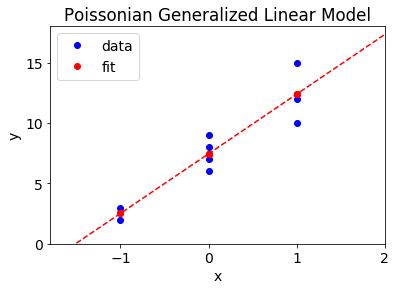

In [19]:
'''show result of GLM-fit'''
plt.plot(x, y, 'bo', label='data')
plt.plot(x, pfit.fittedvalues, 'ro', label='fit')
plt.plot([-1.5, 2.5], pfit.predict([[1, -1.5], [1, 2.5]]), 'r--')
plt.axis((-1.8, 2.0, 0, 18))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Poissonian Generalized Linear Model')
plt.legend(loc='upper left');


# Ergebnis

## `statsmodels` GLM

    statsmodels.GLM( endog=y, exog=X, 
                     family=sm.families.Poisson(link=sm.families.links.identity)
                   ).fit()
    statsmodels.formula.glm( formula='...', 
                             data=..., 
                             family=sm.families.Binomial(link=sm.families.links.logit) 
                           ).fit()

#### kann *Generalized Linear Models* mit verschiedenen Verteilungsfamilien aus der Exponentialfamilie

                 + ident log logit probit cloglog pow opow nbinom loglog logc
    Gaussian     |   x    x                        x
    binomial     |   x    x    x     x       x     x    x           x      x
    Poission     |   x    x                        x
    inv Gaussian |   x    x                        x
    neg binomial |   x    x                        x          x
    gamma        |   x    x                        x

Quelle: http://statsmodels.sourceforge.net/devel/generated/statsmodels.genmod.generalized_linear_model.GLM.html

#### benutzt *IRLS*
Um den Parametervektor $\boldsymbol\beta$ des Modells zu bestimmen

#### liefert Ergebnis
- `.predict`
- `.fittedvalues`
- `.params`
- ...  ... ... ` # TAB-completion`

## (erstes) Ergebnis GLM
####  Modell
$$\begin{align} \mathcal{E}(\mathbf{Y}) &= \boldsymbol\mu \\
                 g(\boldsymbol\mu) &= \boldsymbol\eta = \mathbf{X}\boldsymbol\beta \end{align}$$
- abhängige ($Y$) und unabhängige ($X$) Variablen
- Verteilung $f(Y)$ aus der Exponentialfamilie
    - Gauß
    - Poisson
    - Binomial
    - Weibull
    - ...
- Linkfunktion $g$
- Linearer Prediktor $\boldsymbol\eta$

#### Punkt-Schätzer für Parameter 
- ML-Schätzer Parameter $\widehat{\boldsymbol\beta}$
- Numerische Lösung mittels *Iterative Reweighted Least Squares*-Methode "*IRLS*"


### Ausblick
Intervallschätzer für Parameter $\widehat{\boldsymbol\beta}$

# Fragen?